In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [27]:
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Exploring data

In [28]:
#Inforamation about data like dtype,data columns and Non-Null Count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [29]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [30]:
#Descriptive statistics
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [31]:
#shape of data (rows,columns)
data.shape

(100000, 9)

In [32]:
#finding null values
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


No Null values seen in data

In [33]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [34]:
print(data.duplicated().sum())

3854


In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.shape

(96146, 9)

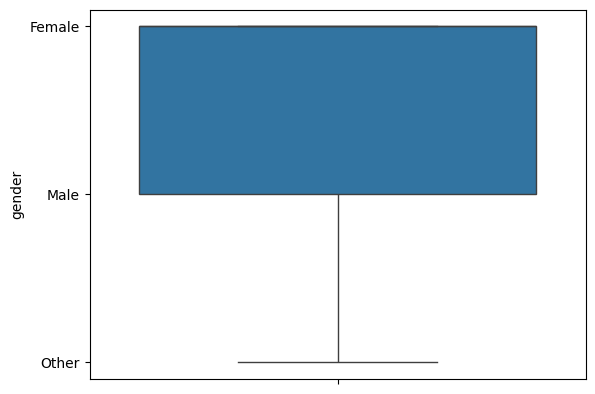

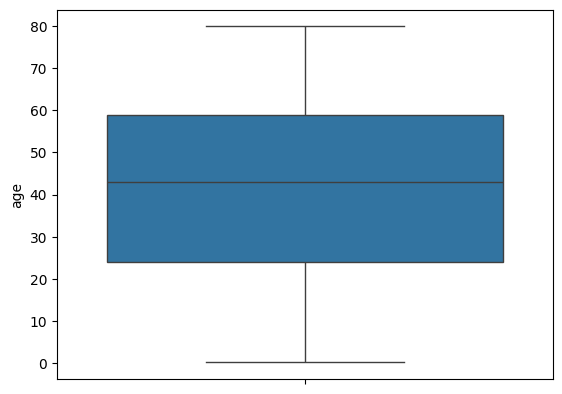

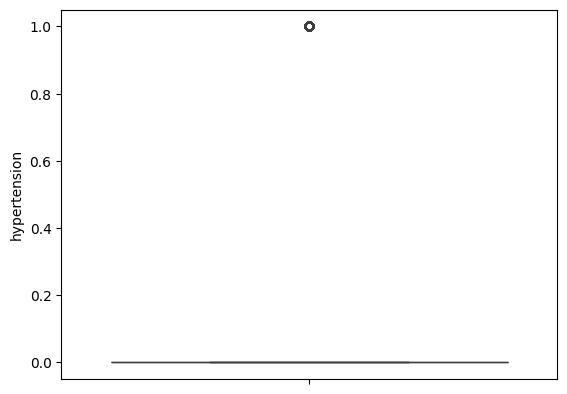

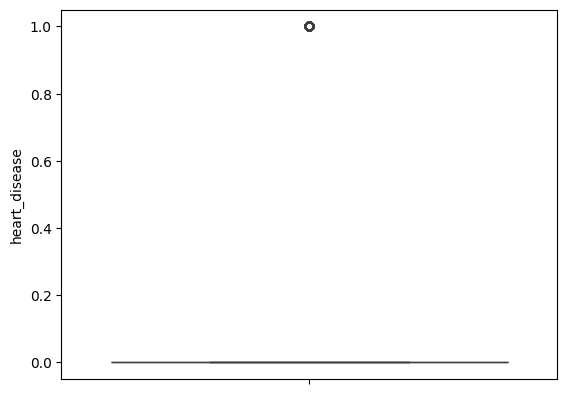

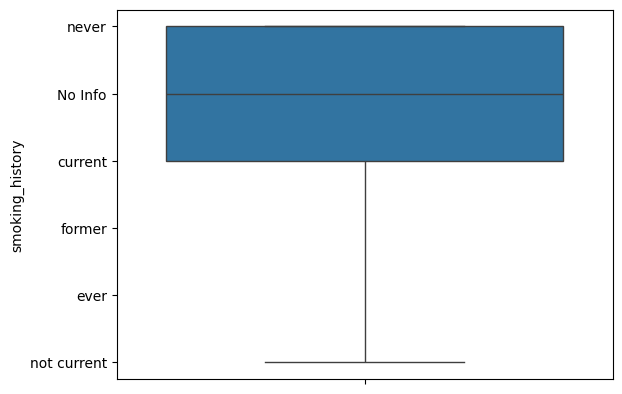

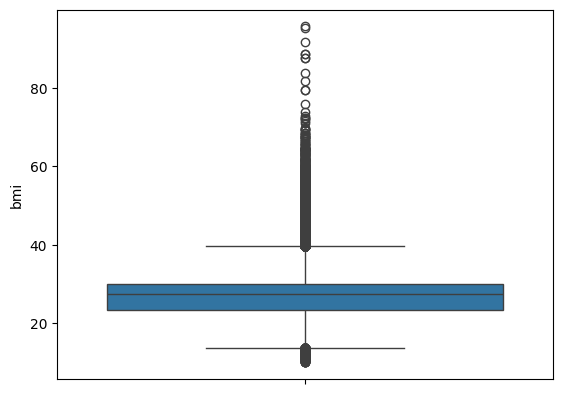

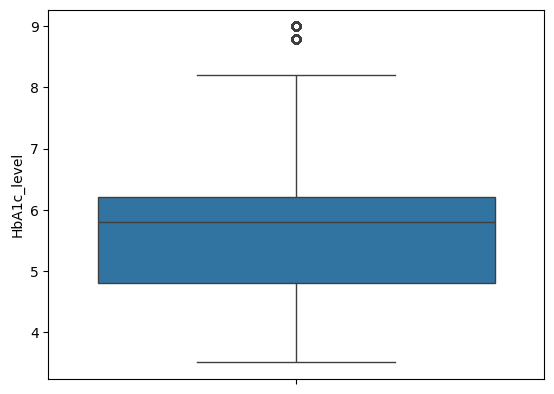

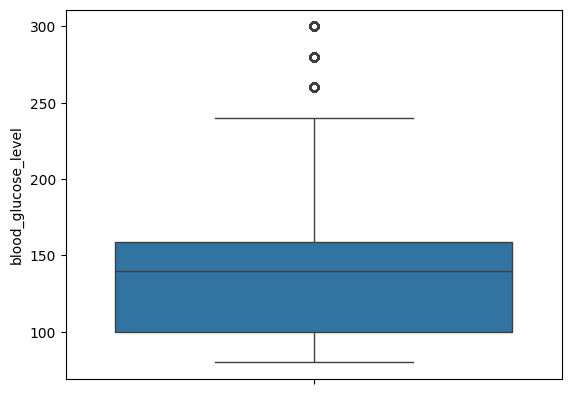

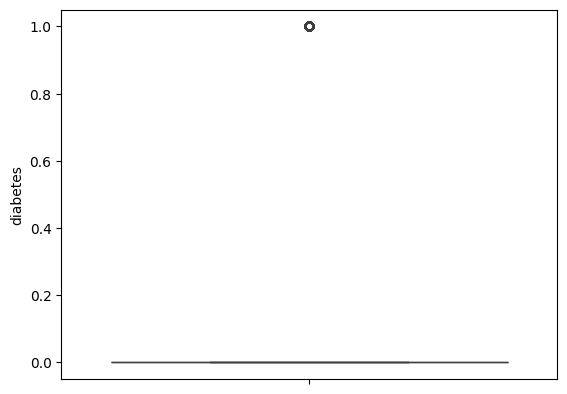

In [37]:
#finding outliers :
for i in data.columns:
  sns.boxplot(data=data[i])
  plt.show()

outliers seen in bmi,HbA1c_Level,blood_glucose_level

In [38]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [39]:
data = pd.get_dummies(
    data,
    columns=['smoking_history'],
    prefix='smoke',
    dummy_na=False,
    dtype=np.int8      # or simply int
)



In [40]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoke_No Info', 'smoke_current',
       'smoke_ever', 'smoke_former', 'smoke_never', 'smoke_not current'],
      dtype='object')

In [41]:
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current
0,Female,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,Female,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,Male,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,Female,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,Male,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [42]:
data = pd.get_dummies(
    data,
    columns=['gender'],
    prefix='gender',
    dummy_na=False,
    dtype=np.int8      # or simply int
)

In [43]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


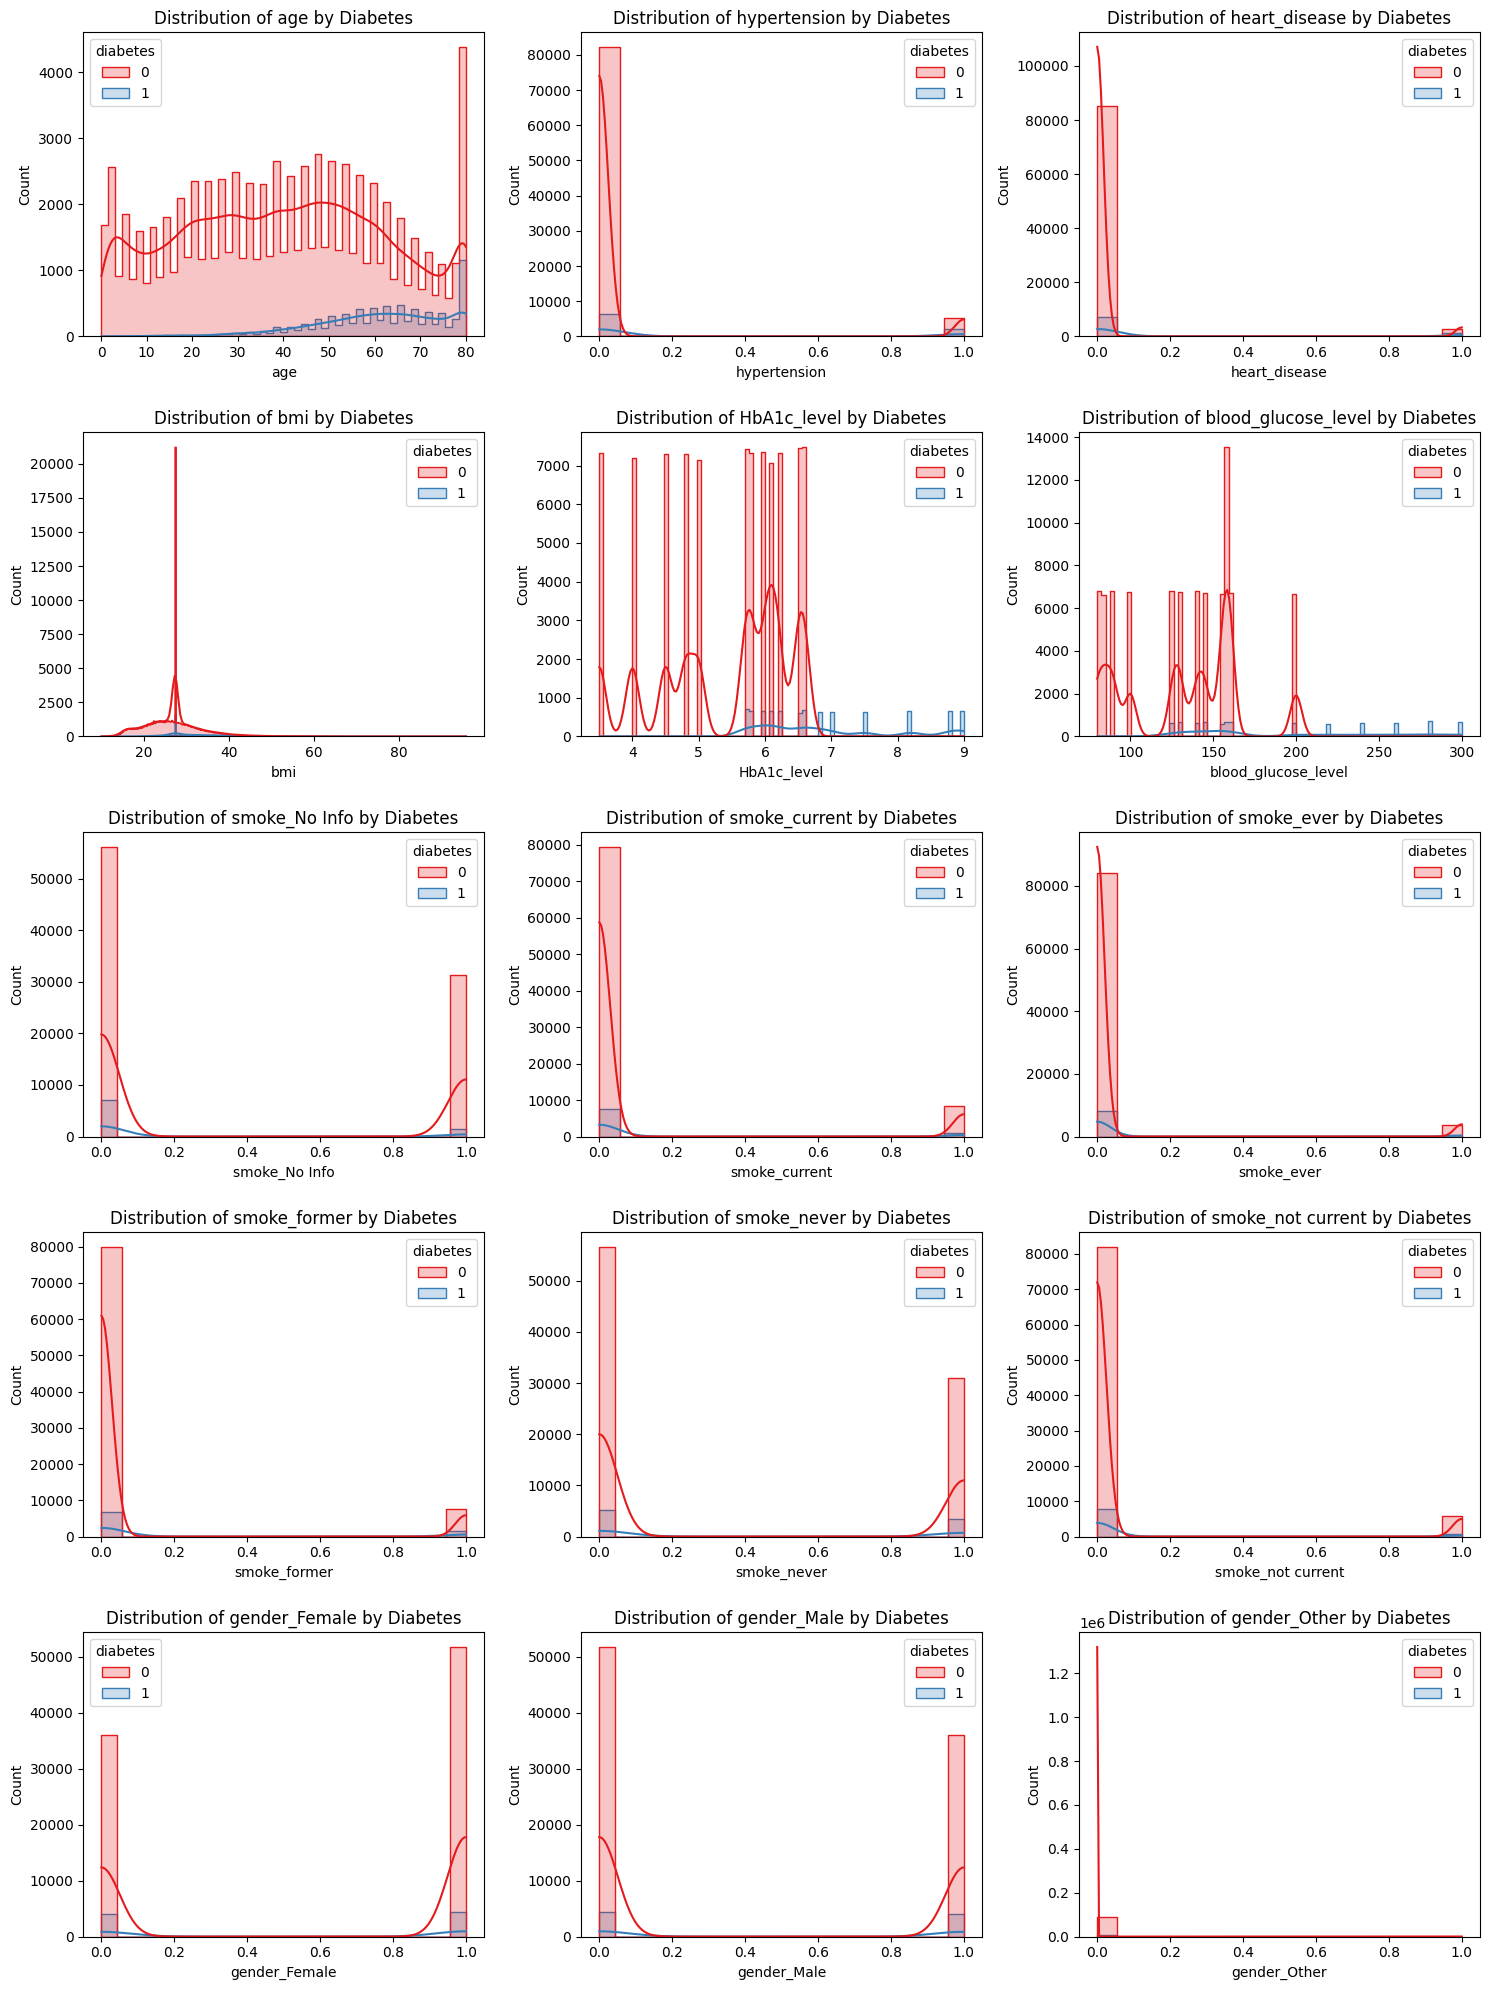

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only (excluding 'diabetes')
numeric_cols = data.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'diabetes']

cols = 3
rows = (len(numeric_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each feature with hue='diabetes'
for i, col in enumerate(numeric_cols):
    sns.histplot(data=data, x=col, hue='diabetes', kde=True, ax=axes[i], palette='Set1', element='step')
    axes[i].set_title(f'Distribution of {col} by Diabetes')

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [45]:
data.groupby('diabetes').mean(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current,gender_Female,gender_Male,gender_Other
diabetes,,,,,,,,,,,,,,,
0,39.943229,0.061314,0.030297,26.869003,5.396936,132.818489,0.358665,0.094098,0.040222,0.087938,0.354319,0.064759,0.589911,0.409883,0.000205
1,60.925961,0.245933,0.149375,31.997755,6.934827,194.026173,0.170361,0.111766,0.055647,0.187456,0.393421,0.081349,0.524287,0.475713,0.000000


Outliners Treatment

In [46]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


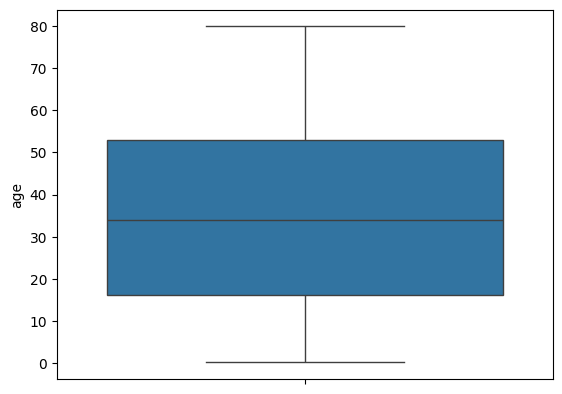

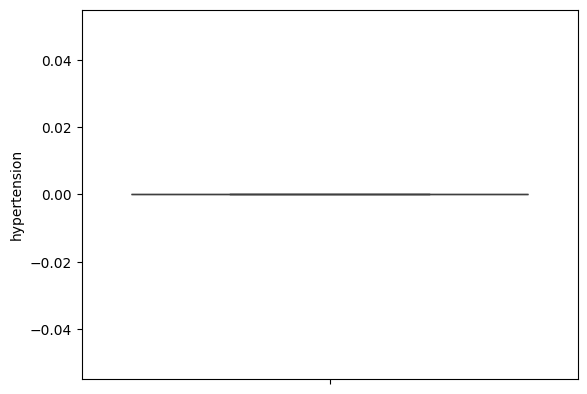

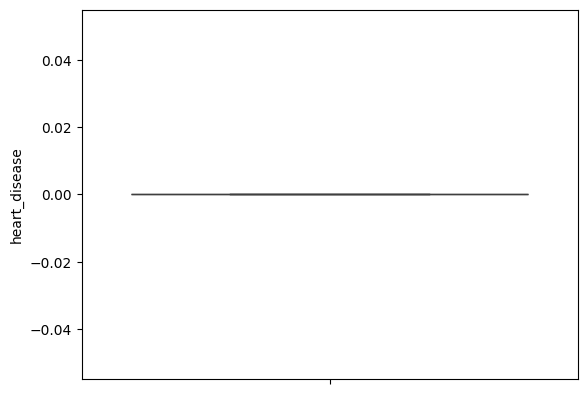

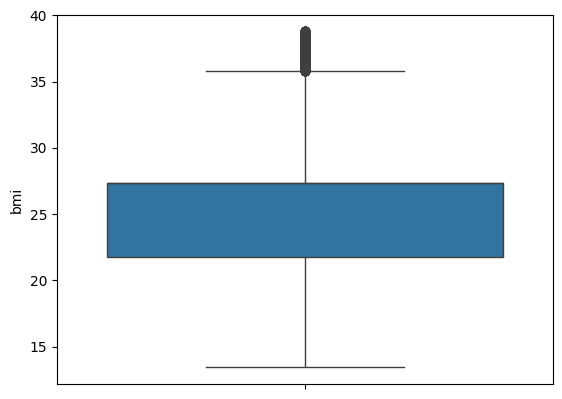

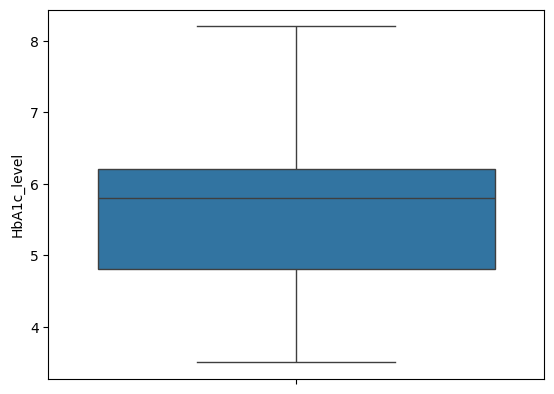

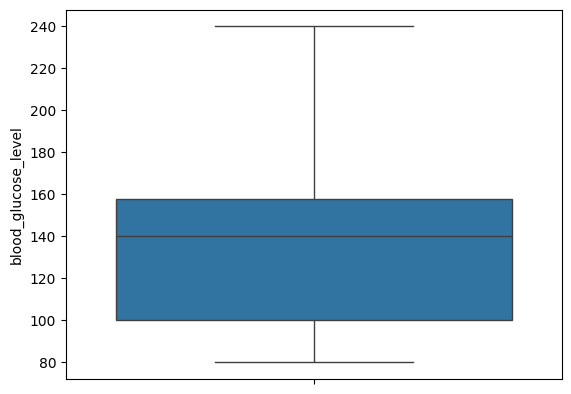

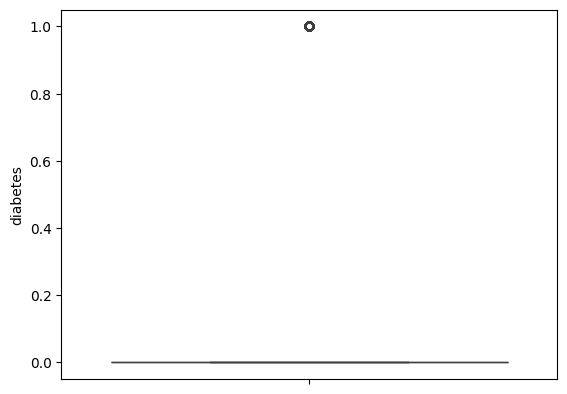

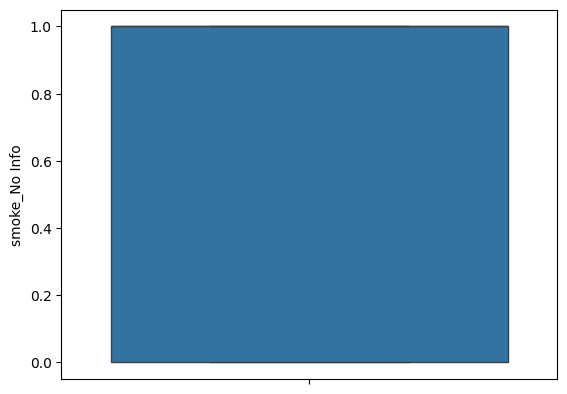

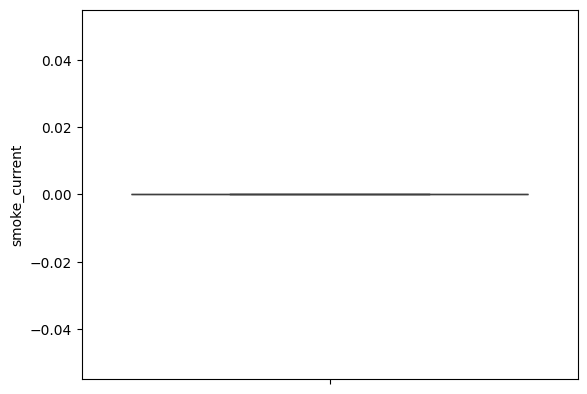

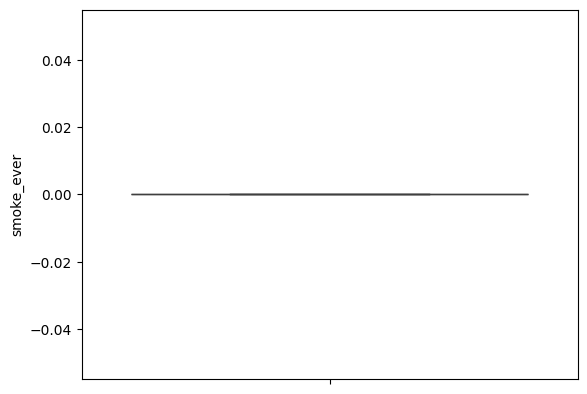

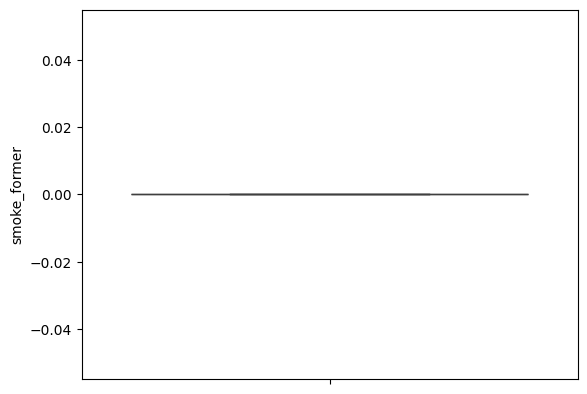

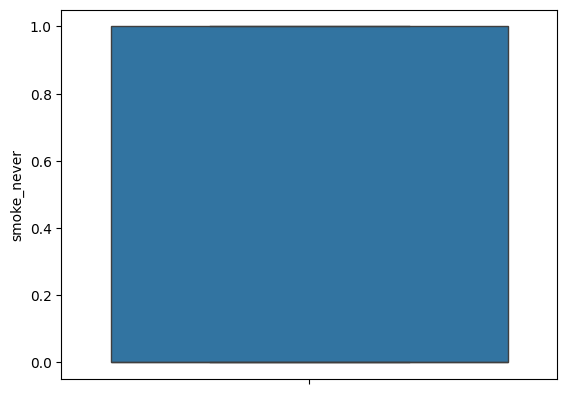

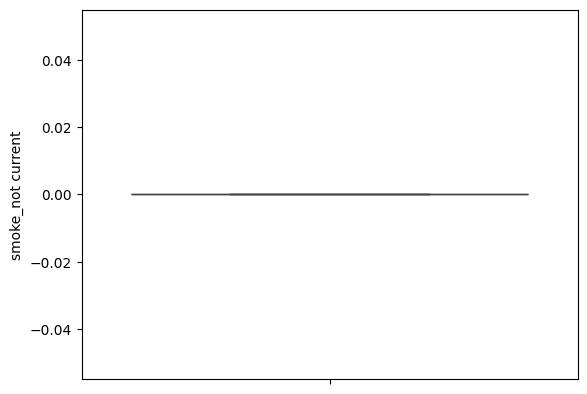

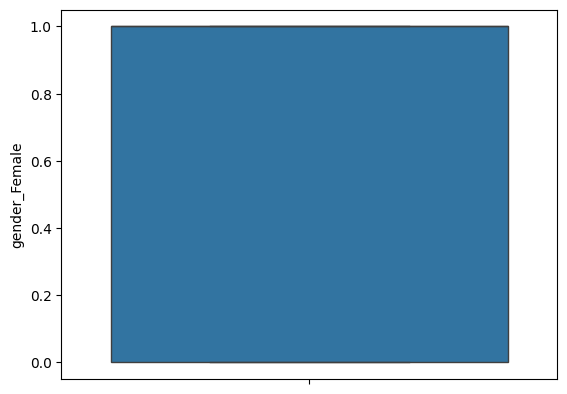

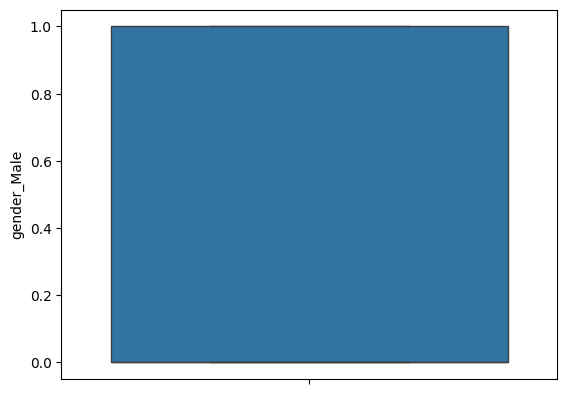

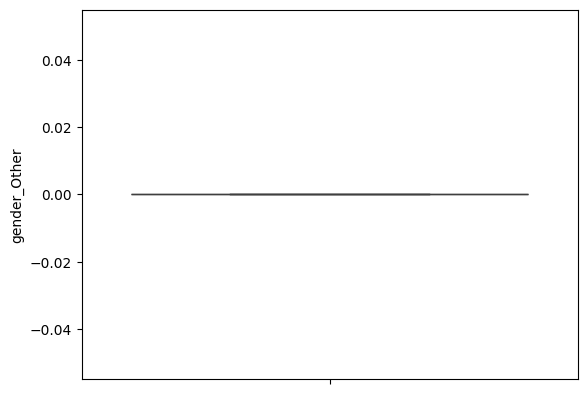

In [47]:
for i in data.columns:   #outliners fixed
  sns.boxplot(data=data[i])
  plt.show()

In [49]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoke_No Info', 'smoke_current',
       'smoke_ever', 'smoke_former', 'smoke_never', 'smoke_not current',
       'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

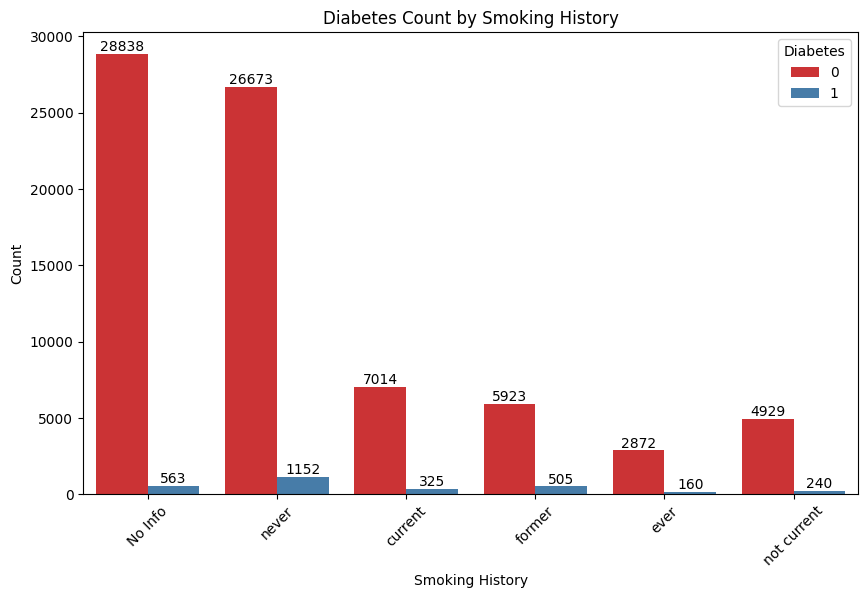

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='smoking_history', hue='diabetes', palette='Set1')
plt.title('Diabetes Count by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diabetes')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79194 entries, 1 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  79194 non-null  float64
 1   hypertension         79194 non-null  int64  
 2   heart_disease        79194 non-null  int64  
 3   bmi                  79194 non-null  float64
 4   HbA1c_level          79194 non-null  float64
 5   blood_glucose_level  79194 non-null  int64  
 6   diabetes             79194 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 6.8 MB


In [66]:
data[data['diabetes']==1]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current,gender_Female,gender_Male,gender_Other
6,44.0,0,0,19.31,6.5,200,1,0,0,0,0,1,0,1,0,0
81,57.0,0,0,27.32,8.2,126,1,1,0,0,0,0,0,0,1,0
96,67.0,0,0,27.32,6.2,159,1,0,0,0,0,1,0,1,0,0
136,47.0,0,0,36.49,7.5,155,1,0,0,0,0,1,0,1,0,0
174,76.0,0,0,31.90,7.5,155,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99395,77.0,0,0,26.00,7.5,145,1,0,0,0,0,1,0,1,0,0
99468,41.0,0,0,22.59,7.5,155,1,0,0,0,0,1,0,1,0,0
99694,39.0,0,0,32.04,5.7,200,1,0,0,0,0,1,0,1,0,0
99819,80.0,0,0,22.04,8.2,130,1,0,0,0,0,1,0,1,0,0


In [76]:
data[data['diabetes']==0]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoke_No Info,smoke_current,smoke_ever,smoke_former,smoke_never,smoke_not current,gender_Female,gender_Male,gender_Other
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
5,20.0,0,0,27.32,6.6,85,0,0,0,0,0,1,0,1,0,0
7,79.0,0,0,23.86,5.7,85,0,1,0,0,0,0,0,1,0,0
8,42.0,0,0,33.64,4.8,145,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,19.0,0,0,25.75,5.0,145,0,1,0,0,0,0,0,0,1,0
99992,26.0,0,0,34.34,6.5,160,0,0,0,0,0,1,0,1,0,0
99994,36.0,0,0,24.60,4.8,145,0,1,0,0,0,0,0,1,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0,1,0,0


In [ ]:
data[data['diabetes']==0]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
5,20.0,0,0,27.32,6.6,85,0
7,79.0,0,0,23.86,5.7,85,0
...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [52]:
X = data.drop('diabetes',axis=1)
y = data['diabetes']

In [ ]:
print(X,y)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
5      20.0             0              0  27.32          6.6   
6      44.0             0              0  19.31          6.5   
...     ...           ...            ...    ...          ...   
99994  36.0             0              0  24.60          4.8   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
1                       80  
2                      158  
3                      155  
5                       85  
6                      200  
...                    ...  
99994                  145  

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Standard_data = scaler.fit_transform(X)
X = Standard_data

In [ ]:
X

array([[ 0.70203941,  0.        ,  0.        ,  0.26447668,  1.17177171,
        -1.54691934],
       [-0.4776375 ,  0.        ,  0.        ,  0.26447668,  0.26134477,
         0.68377448],
       [-0.11465999,  0.        ,  0.        , -0.48669277, -0.44676507,
         0.59797856],
       ...,
       [ 1.24650568,  0.        ,  0.        ,  0.36346801,  0.26134477,
         0.59797856],
       [-0.65912626,  0.        ,  0.        ,  1.83669182, -1.45835056,
        -0.97494657],
       [ 0.83815598,  0.        ,  0.        , -0.68467541,  1.17177171,
        -1.26093295]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=42)

In [55]:
lg = LogisticRegression()

In [56]:
model = svm.SVC(kernel='linear')

In [57]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [58]:
lg.fit(X_train,y_train)

LogisticRegression()

In [59]:
train_y_pred_lg = lg.predict(X_train)
test_y_pred_lg = lg.predict(X_test)

In [60]:
train_y_pred_svm = model.predict(X_train)
test_y_pred_svm = model.predict(X_test)

In [61]:
print('Train set Accuracy :',accuracy_score(train_y_pred_lg,y_train))
print('Test set Accuracy :',accuracy_score(test_y_pred_lg,y_test))

Train set Accuracy : 0.977094698559239
Test set Accuracy : 1.0


In [62]:
print('Train set Accuracy :',accuracy_score(train_y_pred_svm,y_train))
print('Test set Accuracy :',accuracy_score(test_y_pred_svm,y_test))

Train set Accuracy : 0.9750139879703456
Test set Accuracy : 1.0


Making a Predictive System

In [70]:
input_data = (44.0,0,0,19.31,6.5,200,0,0,0,0,1,0,1,0,0)
input_data_nparray = np.asarray(input_data)
reshaped_input_data = input_data_nparray.reshape(1,-1)
scaler = StandardScaler()
scaler.fit(reshaped_input_data)
std_data = scaler.transform(reshaped_input_data)
prediction = lg.predict(reshaped_input_data)

if prediction == 1:
    print('this person has a diabetes')
else:
    print("this person has not diabetes")

this person has a diabetes
